In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Import necessary libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def load_and_preprocess_data(filepath):
    # Load the data
    data = pd.read_csv('train.csv')

    # Handle missing values
    # Impute missing values in 'Age' with the median
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])

    # Fill missing 'Embarked' values with the mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Assume 'Cabin' has many missing values; you might decide to drop it
    # data.drop('Cabin', axis=1, inplace=True)

    # Convert categorical variables to numerical
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

    # Select relevant features and the target variable
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  # Example features
    X = data[features]
    y = data['Survived']  # Assuming 'Survived' is the target variable

    return X, y

def tune_hyperparameters(X_train, y_train):
    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
        'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
    }

    # Initialize Random Forest model
    rf = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_


def main():
    # Set the path to your dataset
    filepath_train = 'train.csv'  # Path to the training dataset
    filepath_test = 'test.csv'    # Path to the test dataset

    # Load and preprocess training data
    X_train, y_train = load_and_preprocess_data('train.csv')

    # Split the training data for model evaluation
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Hyperparameter tuning
    best_model = tune_hyperparameters(X_train_split, y_train_split)

    # Train the best model on the entire training data
    best_model.fit(X_train, y_train)

    # Evaluate the model on the split test data
    predictions = best_model.predict(X_test_split)
    accuracy = accuracy_score(y_test_split, predictions)
    print(f"Test Accuracy: {accuracy}")

    # Perform cross-validation on the entire training data
    cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    print(f"Cross-Validation Scores: {cross_val_scores}")
    print(f"Average CV Score: {cross_val_scores.mean()}")


# Run the main function
if __name__ == "__main__":
    main()



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test Accuracy: 0.8715083798882681


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-Validation Scores: [0.79329609 0.81460674 0.85393258 0.79775281 0.85393258]
Average CV Score: 0.8227041616973197


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Evaluating Model 1 with Parameters: {'n_estimators': 50, 'max_depth': 10}
Accuracy: 0.816
Precision: 0.815
Recall: 0.716


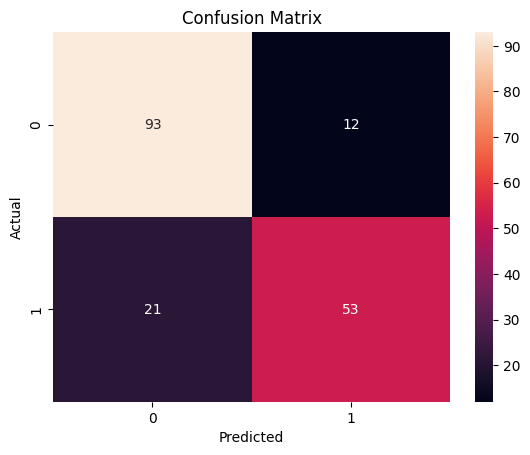

Evaluating Model 2 with Parameters: {'n_estimators': 100, 'max_depth': 20}
Accuracy: 0.821
Precision: 0.809
Recall: 0.743


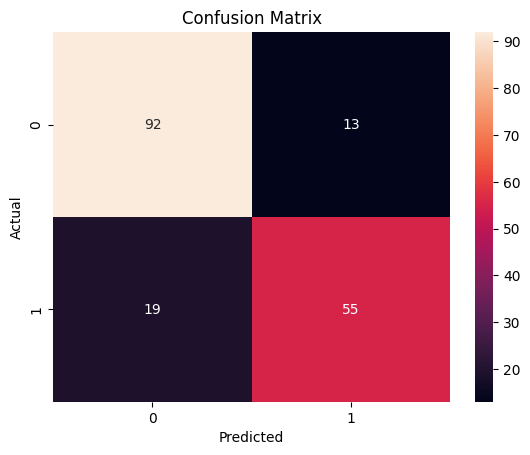

Evaluating Model 3 with Parameters: {'n_estimators': 150, 'max_depth': 30}
Accuracy: 0.816
Precision: 0.797
Recall: 0.743


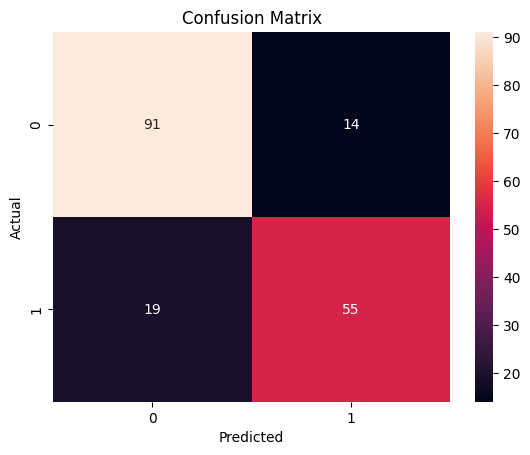

Evaluating Model 4 with Parameters: {'n_estimators': 200, 'max_depth': None}
Accuracy: 0.810
Precision: 0.778
Recall: 0.757


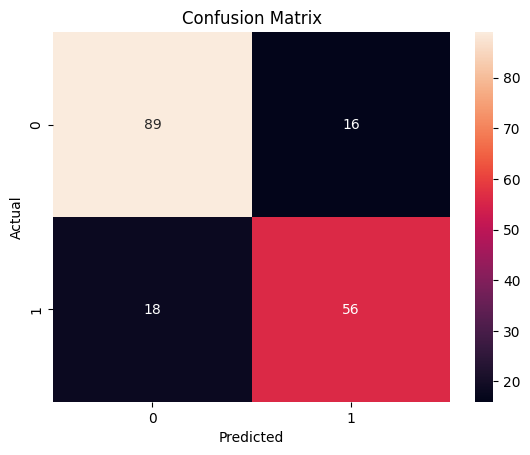

Evaluating Model 5 with Parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 4}
Accuracy: 0.838
Precision: 0.846
Recall: 0.743


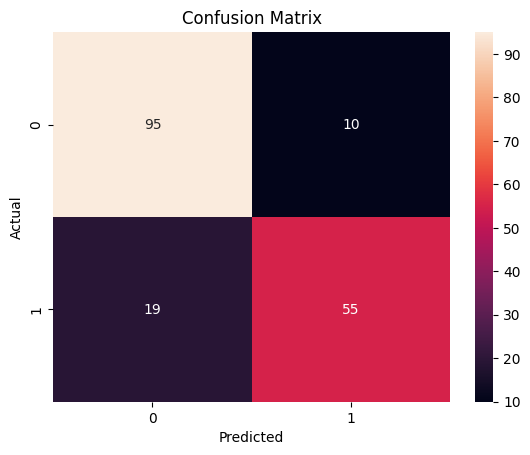

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Import necessary libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def load_and_preprocess_data(filepath):
    # Load the data
    data = pd.read_csv('train.csv')

    # Handle missing values
    # Impute missing values in 'Age' with the median
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])

    # Fill missing 'Embarked' values with the mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Assume 'Cabin' has many missing values; you might decide to drop it
    # data.drop('Cabin', axis=1, inplace=True)

    # Convert categorical variables to numerical
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

    # Select relevant features and the target variable
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  # Example features
    X = data[features]
    y = data['Survived']  # Assuming 'Survived' is the target variable

    return X, y

# def tune_hyperparameters(X_train, y_train):
#     # Define parameter grid
#     param_grid = {
#         'n_estimators': [50, 100, 200],  # Number of trees in the forest
#         'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#         'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#         'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
#         'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
#     }

#     # Initialize Random Forest model
#     rf = RandomForestClassifier(random_state=42)

#     # Initialize GridSearchCV
#     grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#     # Fit GridSearchCV
#     grid_search.fit(X_train, y_train)

#     return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    # Print metrics
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

param_sets = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 20},
    {'n_estimators': 150, 'max_depth': 30},
    {'n_estimators': 200, 'max_depth': None},
    {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 4}
]

def main():
    # Set the path to your dataset
    filepath_train = 'train.csv'  # Path to the training dataset
    filepath_test = 'test.csv'    # Path to the test dataset

    # Load and preprocess training data
    X_train, y_train = load_and_preprocess_data('train.csv')

    # Split the training data for model evaluation
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # # Hyperparameter tuning
    # best_model = tune_hyperparameters(X_train_split, y_train_split)

    # # Train the best model on the entire training data
    # best_model.fit(X_train, y_train)

    # # Evaluate the model on the split test data
    # predictions = best_model.predict(X_test_split)
    # accuracy = accuracy_score(y_test_split, predictions)
    # print(f"Test Accuracy: {accuracy}")

    # # Perform cross-validation on the entire training data
    # cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    # print(f"Cross-Validation Scores: {cross_val_scores}")
    # print(f"Average CV Score: {cross_val_scores.mean()}")

    for i, params in enumerate(param_sets, 1):
        print(f"Evaluating Model {i} with Parameters: {params}")
        model = RandomForestClassifier(**params, random_state=42)
        model.fit(X_train_split, y_train_split)
        evaluate_model(model, X_test_split, y_test_split)

# Run the main function
if __name__ == "__main__":
    main()

Evaluating Model 1 with Parameters: {'n_estimators': 50, 'max_depth': 10}
CV Accuracy: 0.823 +/- 0.020
CV Precision: 0.805 +/- 0.038
CV Recall: 0.713 +/- 0.056


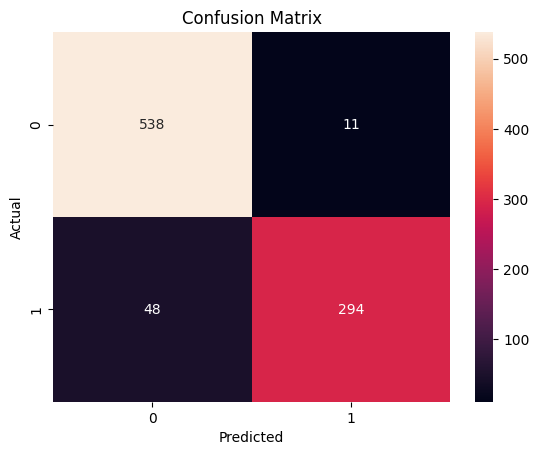

The model seems to generalize well on the training data.
Evaluating Model 2 with Parameters: {'n_estimators': 100, 'max_depth': 20}
CV Accuracy: 0.808 +/- 0.033
CV Precision: 0.761 +/- 0.044
CV Recall: 0.731 +/- 0.065


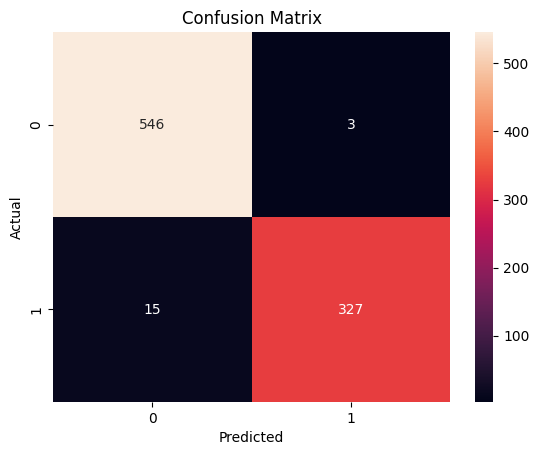

The model seems to generalize well on the training data.
Evaluating Model 3 with Parameters: {'n_estimators': 150, 'max_depth': 30}
CV Accuracy: 0.815 +/- 0.032
CV Precision: 0.769 +/- 0.043
CV Recall: 0.742 +/- 0.075


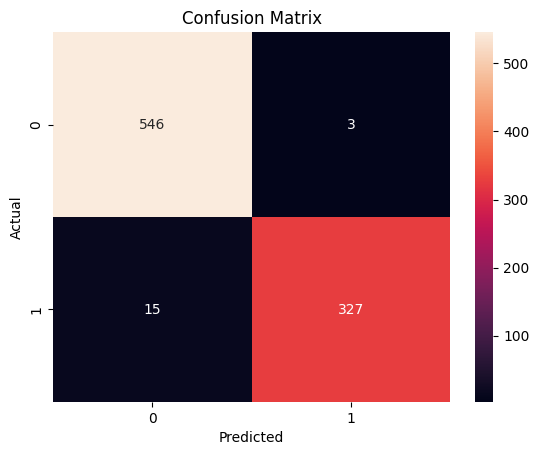

The model seems to generalize well on the training data.
Evaluating Model 4 with Parameters: {'n_estimators': 200, 'max_depth': None}
CV Accuracy: 0.808 +/- 0.030
CV Precision: 0.761 +/- 0.044
CV Recall: 0.734 +/- 0.069


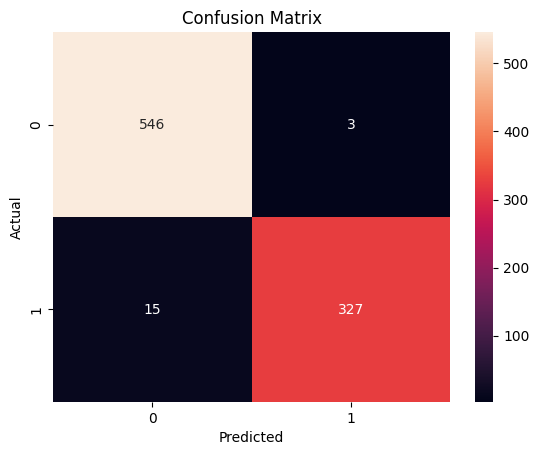

The model seems to generalize well on the training data.
Evaluating Model 5 with Parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 4}
CV Accuracy: 0.825 +/- 0.029
CV Precision: 0.796 +/- 0.038
CV Recall: 0.734 +/- 0.077


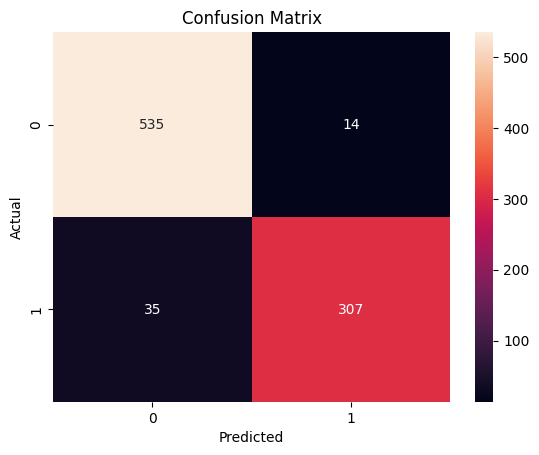

The model seems to generalize well on the training data.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Import necessary libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, confusion_matrix, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

def load_and_preprocess_data(filepath):
    # Load the data
    data = pd.read_csv('train.csv')

    # Handle missing values
    # Impute missing values in 'Age' with the median
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])

    # Fill missing 'Embarked' values with the mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

    # Assume 'Cabin' has many missing values; you might decide to drop it
    # data.drop('Cabin', axis=1, inplace=True)

    # Convert categorical variables to numerical
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

    # Select relevant features and the target variable
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  # Example features
    X = data[features]
    y = data['Survived']  # Assuming 'Survived' is the target variable

    return X, y

# def tune_hyperparameters(X_train, y_train):
#     # Define parameter grid
#     param_grid = {
#         'n_estimators': [50, 100, 200],  # Number of trees in the forest
#         'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#         'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#         'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
#         'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
#     }

#     # Initialize Random Forest model
#     rf = RandomForestClassifier(random_state=42)

#     # Initialize GridSearchCV
#     grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#     # Fit GridSearchCV
#     grid_search.fit(X_train, y_train)

#     return grid_search.best_estimator_

def evaluate_model(model, X, y):
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score)}

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

    # Print cross-validation scores
    print(f'CV Accuracy: {cv_results["test_accuracy"].mean():.3f} +/- {cv_results["test_accuracy"].std():.3f}')
    print(f'CV Precision: {cv_results["test_precision"].mean():.3f} +/- {cv_results["test_precision"].std():.3f}')
    print(f'CV Recall: {cv_results["test_recall"].mean():.3f} +/- {cv_results["test_recall"].std():.3f}')

    # Fit the model on the entire dataset
    model.fit(X, y)

    # Confusion Matrix on the entire dataset
    predictions = model.predict(X)
    cm = confusion_matrix(y, predictions)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Discussing potential underfitting or overfitting
    if cv_results["test_accuracy"].std() > 0.05:
        print("The model might be overfitting to the training data.")
    else:
        print("The model seems to generalize well on the training data.")



param_sets = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 20},
    {'n_estimators': 150, 'max_depth': 30},
    {'n_estimators': 200, 'max_depth': None},
    {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 4}
]

def main():
    # Set the path to your dataset
    filepath_train = 'train.csv'  # Path to the training dataset
    filepath_test = 'test.csv'    # Path to the test dataset

    # Load and preprocess training data
    X_train, y_train = load_and_preprocess_data('train.csv')

    # Split the training data for model evaluation
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # # Hyperparameter tuning
    # best_model = tune_hyperparameters(X_train_split, y_train_split)

    # # Train the best model on the entire training data
    # best_model.fit(X_train, y_train)

    # # Evaluate the model on the split test data
    # predictions = best_model.predict(X_test_split)
    # accuracy = accuracy_score(y_test_split, predictions)
    # print(f"Test Accuracy: {accuracy}")

    # # Perform cross-validation on the entire training data
    # cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    # print(f"Cross-Validation Scores: {cross_val_scores}")
    # print(f"Average CV Score: {cross_val_scores.mean()}")

    for i, params in enumerate(param_sets, 1):
        print(f"Evaluating Model {i} with Parameters: {params}")
        model = RandomForestClassifier(**params, random_state=42)
        evaluate_model(model, X_train, y_train)

# Run the main function
if __name__ == "__main__":
    main()

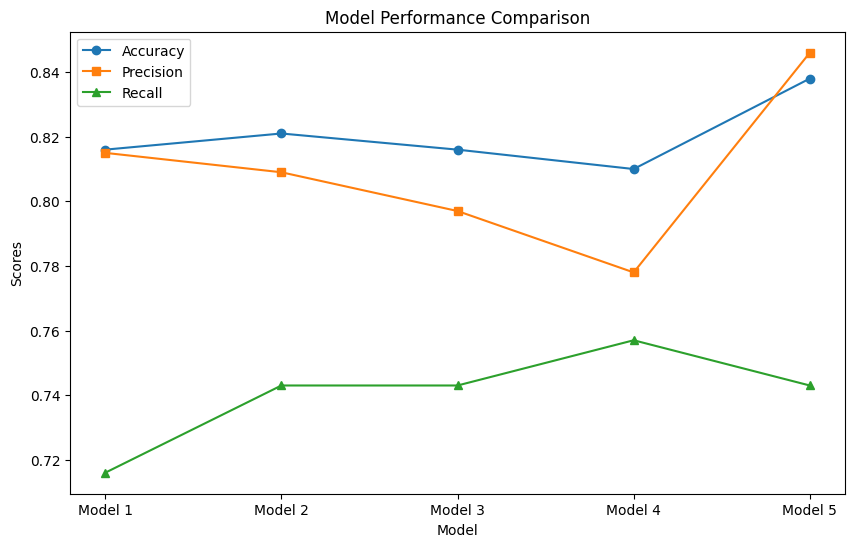

In [ ]:
import matplotlib.pyplot as plt

# Example data for accuracy, precision, and recall for different models
model_params = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
accuracies = [0.816, 0.821, 0.816, 0.810, 0.838]  # Sample accuracies for each model
precisions = [0.815, 0.809, 0.797, 0.778, 0.846]  # Sample precisions for each model
recalls = [0.716, 0.743, 0.743, 0.757, 0.743]     # Sample recalls for each model

# Creating the plot
plt.figure(figsize=(10, 6))

plt.plot(model_params, accuracies, marker='o', label='Accuracy')
plt.plot(model_params, precisions, marker='s', label='Precision')
plt.plot(model_params, recalls, marker='^', label='Recall')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()

# Display the plot
plt.show()
